In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [14]:
def vary_threads(executable_file):
    li = []
    for th in range(2, 17, 2):
        # Open file inp-params.txt
        f = open("inp-params.txt", "w")
        f.write(f"{th} 5000 2.0")
        f.close()
        li_temp = []
        for _ in range(5):
            # Run executable 5 times
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            # Read output file
            f1 = open("1.txt", "r")
            a = float(f1.readline())
            f1.close()
            li_temp.append(a)
        li.append(li_temp)
        # print(li)
    return li

In [18]:
def vary_numOps(executable_file):
    li = []
    for nu in range(1000, 6000, 1000):
        # Open file inp-params.txt
        f = open("inp-params.txt", "w")
        f.write(f"16 {nu} 2.0")
        f.close()
        li_temp = []
        for _ in range(5):
            # Run executable 5 times
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            # Read output file
            f1 = open("1.txt", "r")
            a = float(f1.readline())
            f1.close()
            li_temp.append(a)
        li.append(li_temp)
        # print(li)
    return li

In [10]:
f = open("1.txt", "r")
# read a decimal number
a = float(f.readline())
f.close()
print(a)

50.5875


In [15]:
mrmw_vary_thread = vary_threads("MRMW_custom")
print(mrmw_vary_thread)

[[26.361, 32.5683, 29.679, 37.028, 36.8475], [27.1527, 23.427, 28.01, 21.6625, 24.5424], [25.69, 27.7058, 39.6514, 37.0047, 30.3111], [26.0158, 25.6724, 33.0055, 28.2085, 29.5588], [29.0676, 29.061, 29.9419, 29.3657, 30.5768], [27.1815, 30.1735, 29.4034, 29.4279, 26.0365], [29.0138, 29.2843, 27.4182, 28.3777, 28.9475], [30.5553, 26.0938, 30.2036, 31.2136, 28.6647]]


In [16]:
atomic_vary_thread = vary_threads("MRMW_atomic")
print(atomic_vary_thread)

[[32.8783, 36.1826, 33.2661, 33.4249, 28.6039], [28.3449, 34.2469, 32.6336, 33.4337, 34.992], [31.5314, 29.5809, 32.8497, 32.2675, 32.2658], [31.8364, 32.0792, 31.9637, 31.8383, 31.9794], [32.6301, 31.67, 31.7543, 32.7255, 31.0819], [36.0423, 32.413, 30.8397, 32.6526, 33.2968], [30.6862, 32.6253, 32.5475, 31.8482, 33.1747], [32.95, 32.2483, 32.9139, 32.6797, 33.605]]


In [19]:
mrmw_vary_numOps = vary_numOps("MRMW_custom")
print(mrmw_vary_numOps)

[[22.8726, 26.6398, 25.9944, 23.4584, 21.9982], [26.0487, 24.4892, 25.5911, 25.1868, 27.1807], [32.2174, 26.2767, 25.5752, 29.0864, 24.3793], [29.8109, 27.6593, 30.5264, 27.9751, 29.0705], [26.5724, 30.3534, 26.5686, 28.6312, 25.7369]]


In [21]:
atomic_vary_numOps = vary_numOps("MRMW_atomic")
print(atomic_vary_numOps)

[[25.6161, 32.0155, 26.9896, 35.4441, 35.0055], [30.1131, 32.2356, 32.2842, 32.1352, 31.0778], [32.1797, 31.8887, 33.6133, 32.3436, 30.3054], [36.1362, 31.1735, 31.9672, 31.5735, 32.3738], [29.9358, 32.7961, 31.3734, 34.2614, 32.6931]]


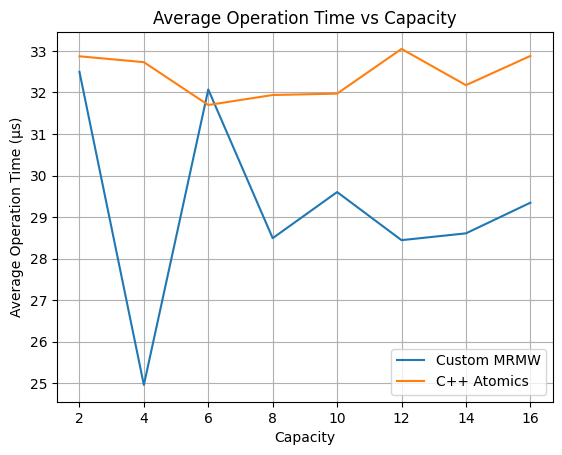

In [28]:
# Take the average of the 5 runs
mrmw_vary_thread_mean = np.mean(mrmw_vary_thread, axis=1)
atomic_vary_thread_mean = np.mean(atomic_vary_thread, axis=1)
# Thread array
thread_arr = np.arange(2, 17, 2)
# Plot
plt.plot(thread_arr, mrmw_vary_thread_mean, label="Custom MRMW")
plt.plot(thread_arr, atomic_vary_thread_mean, label="C++ Atomics")
plt.xlabel("Capacity")
plt.ylabel("Average Operation Time (\u03BCs)")
plt.title("Average Operation Time vs Capacity")
plt.legend()
plt.grid()
plt.show()

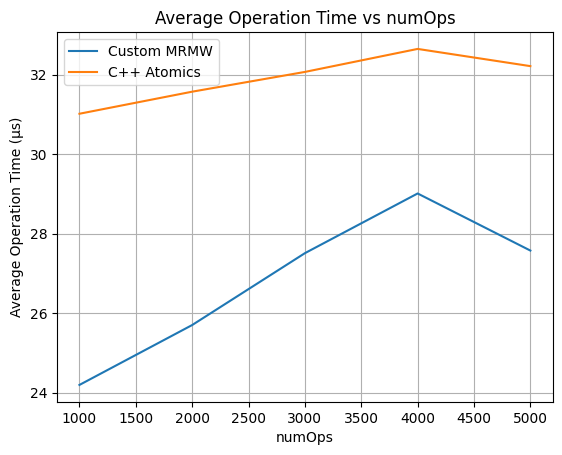

In [29]:
# Take the average of the 5 runs
mrmw_vary_numOps_mean = np.mean(mrmw_vary_numOps, axis=1)
atomic_vary_numOps_mean = np.mean(atomic_vary_numOps, axis=1)
# NumOps array
numOps_arr = np.arange(1000, 6000, 1000)
# Plot
plt.plot(numOps_arr, mrmw_vary_numOps_mean, label="Custom MRMW")
plt.plot(numOps_arr, atomic_vary_numOps_mean, label="C++ Atomics")
plt.xlabel("numOps")
plt.ylabel("Average Operation Time (\u03BCs)")
plt.title("Average Operation Time vs numOps")
plt.legend()
plt.grid()
plt.show()